In [1]:
# General purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("amp")
from PIL import Image

# Data processing
import re, string
import emoji
import demoji
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [2]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [3]:
# Clean emojis from text
def strip_emoji(text):
    return demoji.replace(text, '')

# Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() # remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) # remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) # remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) # remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) # remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

# Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [4]:
mask = np.array(Image.open("../images/word cloud/twitter.png"))

## Start of Covid-19

In [5]:
start = pd.read_csv("sg_start.csv")
start["date"] = pd.to_datetime(start['date'])
start["date"] = start["date"].dt.tz_convert("Etc/GMT+8")
dates = start["date"]
start.index = dates
start.drop("date", axis=1, inplace=True)
start["renderedContent"] = start['renderedContent'].apply(lambda tweet:str(tweet))
start.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-31 10:58:27-08:00,https://twitter.com/eviltofu/status/1245062921...,another effect fatal older member society lose...,another effect fatal older member society lose...,1245062921639477249,https://twitter.com/eviltofu,0,0,1,0,1245062921639477249,...,NaN,NaN,NaN,"Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN
2020-03-31 07:25:03-08:00,https://twitter.com/MhManto/status/12450092195...,industry impact live mobile world live,industry impact live mobile world live,1245009219515871233,https://twitter.com/MhManto,0,0,0,0,1245009219515871233,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Covid-19 industry impact: L...,NaN,NaN
2020-03-31 07:21:28-08:00,https://twitter.com/lili_eyebags/status/124500...,new case singapore new cluster identified dorm...,new case singapore new cluster identified dorm...,1245008318810058759,https://twitter.com/lili_eyebags,0,0,0,0,1245008318810058759,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='47 new COVID-19 cases in Si...,NaN,NaN
2020-03-31 05:31:43-08:00,https://twitter.com/CoastalLabNTU/status/12449...,covid otter gang war singapore,covid otter gang war singapore,1244980698764603392,https://twitter.com/CoastalLabNTU,0,1,3,0,1244980698764603392,...,NaN,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN
2020-03-31 03:55:33-08:00,https://twitter.com/jimmyjemii/status/12449564...,many year coming untuk buka bazar ramadhan ple...,many year coming untuk buka bazar ramadhan ple...,1244956494585417729,https://twitter.com/jimmyjemii,0,4,6,0,1244956494585417729,...,NaN,NaN,NaN,"Coordinates(longitude=103.543741, latitude=1.3...","Place(id='72d5ecacd2d3a055', fullName='Pulai, ...",NaN,NaN,NaN,NaN,NaN


In [6]:
sentiment_scores = start['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2020-03-31 10:58:27-08:00    {'neg': 0.373, 'neu': 0.422, 'pos': 0.205, 'co...
2020-03-31 07:25:03-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-03-31 07:21:28-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-03-31 05:31:43-08:00    {'neg': 0.494, 'neu': 0.506, 'pos': 0.0, 'comp...
2020-03-31 03:55:33-08:00    {'neg': 0.172, 'neu': 0.718, 'pos': 0.11, 'com...
                                                   ...                        
2020-01-22 01:01:00-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-01-21 17:53:20-08:00    {'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'comp...
2020-01-21 12:30:55-08:00    {'neg': 0.0, 'neu': 0.551, 'pos': 0.449, 'comp...
2020-01-21 08:13:48-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-01-21 07:05:21-08:00    {'neg': 0.0, 'neu': 0.784, 'pos': 0.216, 'comp...
Name: renderedContent, Length: 2166, dtype: object

In [7]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
start["Sentiment"] = sentiment_label
start.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2020-03-31 10:58:27-08:00,https://twitter.com/eviltofu/status/1245062921...,another effect fatal older member society lose...,another effect fatal older member society lose...,1245062921639477249,https://twitter.com/eviltofu,0,0,1,0,1245062921639477249,...,NaN,NaN,"Coordinates(longitude=103.89216999988, latitud...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,Negative
2020-03-31 07:25:03-08:00,https://twitter.com/MhManto/status/12450092195...,industry impact live mobile world live,industry impact live mobile world live,1245009219515871233,https://twitter.com/MhManto,0,0,0,0,1245009219515871233,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Covid-19 industry impact: L...,NaN,NaN,Neutral
2020-03-31 07:21:28-08:00,https://twitter.com/lili_eyebags/status/124500...,new case singapore new cluster identified dorm...,new case singapore new cluster identified dorm...,1245008318810058759,https://twitter.com/lili_eyebags,0,0,0,0,1245008318810058759,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='47 new COVID-19 cases in Si...,NaN,NaN,Neutral
2020-03-31 05:31:43-08:00,https://twitter.com/CoastalLabNTU/status/12449...,covid otter gang war singapore,covid otter gang war singapore,1244980698764603392,https://twitter.com/CoastalLabNTU,0,1,3,0,1244980698764603392,...,NaN,NaN,"Coordinates(longitude=103.605441448115, latitu...","Place(id='0b37664066a8962a', fullName='West Re...",NaN,NaN,NaN,NaN,NaN,Negative
2020-03-31 03:55:33-08:00,https://twitter.com/jimmyjemii/status/12449564...,many year coming untuk buka bazar ramadhan ple...,many year coming untuk buka bazar ramadhan ple...,1244956494585417729,https://twitter.com/jimmyjemii,0,4,6,0,1244956494585417729,...,NaN,NaN,"Coordinates(longitude=103.543741, latitude=1.3...","Place(id='72d5ecacd2d3a055', fullName='Pulai, ...",NaN,NaN,NaN,NaN,NaN,Negative


In [8]:
negative = start[start["Sentiment"] == "Negative"]
neutral = start[start["Sentiment"] == "Neutral"]
positive = start[start["Sentiment"] == "Positive"]

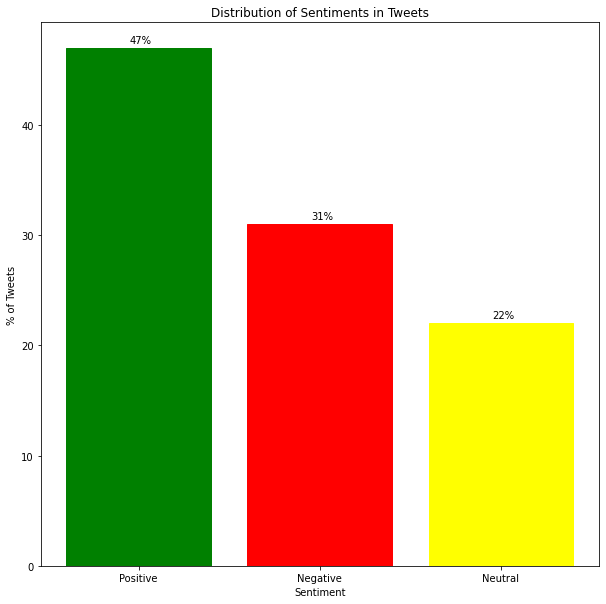

In [9]:
perc_dict = {"Positive": round(len(positive)/len(start)*100), "Negative": round(len(negative)/len(start)*100), "Neutral": round(len(neutral)/len(start)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(start)*100)+0.5, "{}%".format(round(len(positive)/len(start)*100)))
plt.text(1-0.05, round(len(negative)/len(start)*100)+0.5, "{}%".format(round(len(negative)/len(start)*100)))
plt.text(2-0.05, round(len(neutral)/len(start)*100)+0.5, "{}%".format(round(len(neutral)/len(start)*100)))
plt.show()

## Word Clouds

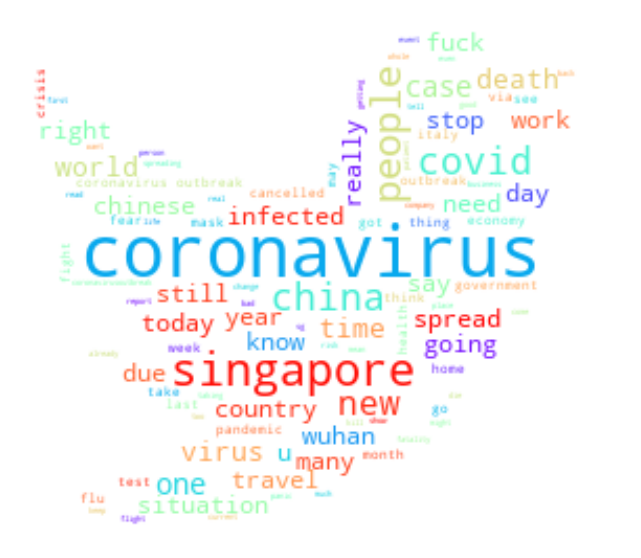

In [10]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

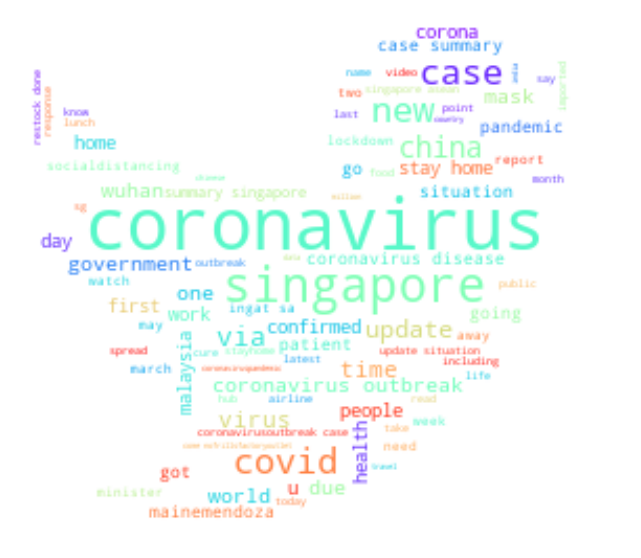

In [11]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

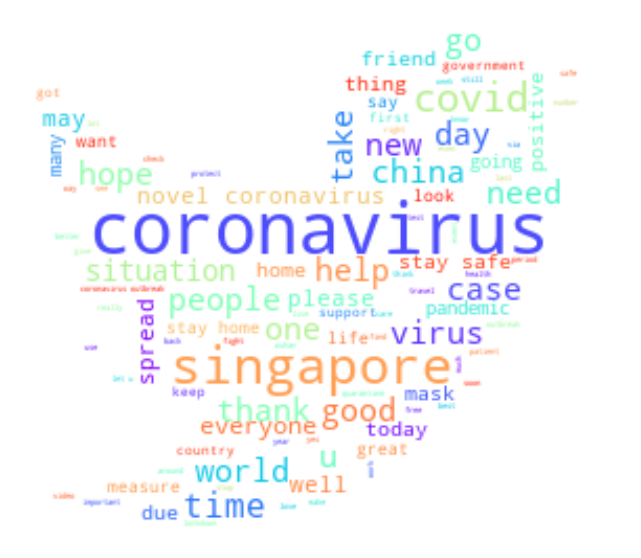

In [12]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [13]:
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

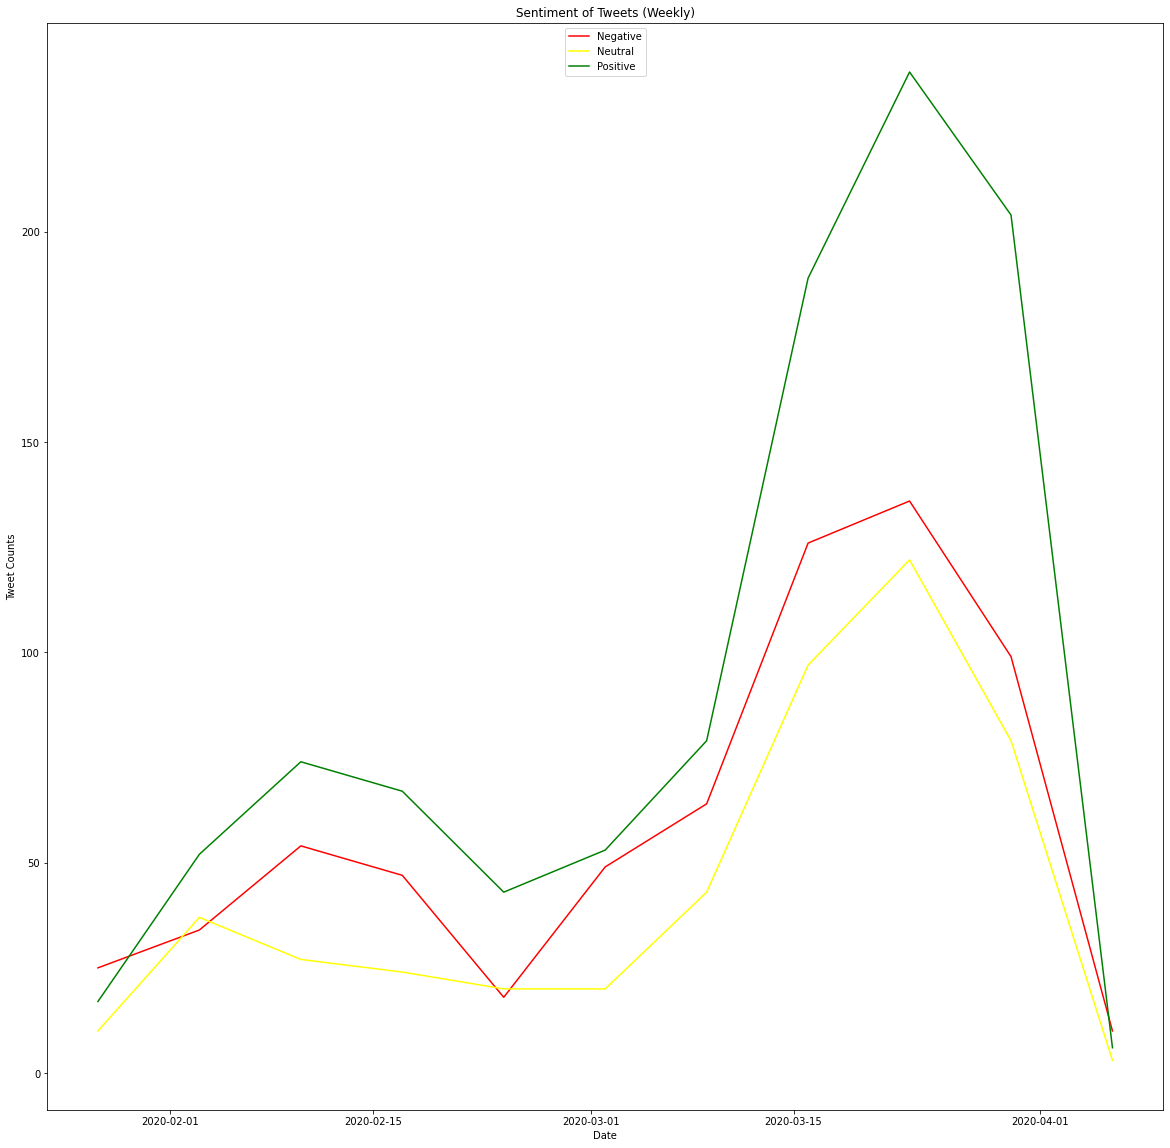

In [14]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Circuit Breaker

In [15]:
cb = pd.read_csv("sg_circuit.csv")
cb["date"] = pd.to_datetime(cb['date'])
cb["date"] = cb["date"].dt.tz_convert("Etc/GMT+8")
dates = cb["date"]
cb.index = dates
cb.drop("date", axis=1, inplace=True)
cb["renderedContent"] = cb['renderedContent'].apply(lambda tweet:str(tweet))
cb.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2020-05-31 15:31:52-08:00,https://twitter.com/yihyng/status/126723739088...,call call day,call call day,1267237390881402881,https://twitter.com/yihyng,0,0,1,0,1267237390881402881,...,NaN,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",['covid_19'],NaN,NaN,NaN,NaN
2020-05-31 15:09:36-08:00,https://twitter.com/JuiceTales/status/12672317...,enter new phase one period healthy body grab n...,enter new phase one period healthy body grab n...,1267231786632790016,https://twitter.com/JuiceTales,0,0,0,0,1267231786632790016,...,NaN,NaN,NaN,"Coordinates(longitude=103.90126705, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
2020-05-31 14:45:29-08:00,https://twitter.com/sitimariamah1/status/12672...,every new month brings new hope new dream new ...,every new month brings new hope new dream new ...,1267225719047950344,https://twitter.com/sitimariamah1,0,0,1,0,1267225719047950344,...,NaN,NaN,NaN,"Coordinates(longitude=103.93690062, latitude=1...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN
2020-05-31 07:23:06-08:00,https://twitter.com/SajidTweetsBD/status/12671...,meanwhile new zealand nine day new covid case ...,meanwhile new zealand nine day new covid case ...,1267114389150134272,https://twitter.com/SajidTweetsBD,0,0,0,0,1267114389150134272,...,NaN,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN
2020-05-31 07:04:52-08:00,https://twitter.com/audreytan/status/126710979...,pandemic unlocked new thing never thought woul...,pandemic unlocked new thing never thought woul...,1267109798010478593,https://twitter.com/audreytan,0,0,1,0,1267109798010478593,...,NaN,NaN,NaN,"Coordinates(longitude=103.856, latitude=1.29306)","Place(id='58a4c3a0d54e1400', fullName='Central...",['Covid'],NaN,NaN,NaN,NaN


In [16]:
sentiment_scores = cb['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2020-05-31 15:31:52-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-05-31 15:09:36-08:00    {'neg': 0.0, 'neu': 0.674, 'pos': 0.326, 'comp...
2020-05-31 14:45:29-08:00    {'neg': 0.0, 'neu': 0.584, 'pos': 0.416, 'comp...
2020-05-31 07:23:06-08:00    {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...
2020-05-31 07:04:52-08:00    {'neg': 0.165, 'neu': 0.688, 'pos': 0.147, 'co...
                                                   ...                        
2020-03-31 20:46:56-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-03-31 19:42:04-08:00    {'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...
2020-03-31 19:21:48-08:00    {'neg': 0.223, 'neu': 0.568, 'pos': 0.21, 'com...
2020-03-31 19:21:30-08:00    {'neg': 0.223, 'neu': 0.568, 'pos': 0.21, 'com...
2020-03-31 18:48:46-08:00    {'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...
Name: renderedContent, Length: 1804, dtype: object

In [17]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
cb["Sentiment"] = sentiment_label
cb.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2020-05-31 15:31:52-08:00,https://twitter.com/yihyng/status/126723739088...,call call day,call call day,1267237390881402881,https://twitter.com/yihyng,0,0,1,0,1267237390881402881,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",['covid_19'],NaN,NaN,NaN,NaN,Neutral
2020-05-31 15:09:36-08:00,https://twitter.com/JuiceTales/status/12672317...,enter new phase one period healthy body grab n...,enter new phase one period healthy body grab n...,1267231786632790016,https://twitter.com/JuiceTales,0,0,0,0,1267231786632790016,...,NaN,NaN,"Coordinates(longitude=103.90126705, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,Positive
2020-05-31 14:45:29-08:00,https://twitter.com/sitimariamah1/status/12672...,every new month brings new hope new dream new ...,every new month brings new hope new dream new ...,1267225719047950344,https://twitter.com/sitimariamah1,0,0,1,0,1267225719047950344,...,NaN,NaN,"Coordinates(longitude=103.93690062, latitude=1...","Place(id='6635b2fcebd13c64', fullName='East Re...",NaN,NaN,NaN,NaN,NaN,Positive
2020-05-31 07:23:06-08:00,https://twitter.com/SajidTweetsBD/status/12671...,meanwhile new zealand nine day new covid case ...,meanwhile new zealand nine day new covid case ...,1267114389150134272,https://twitter.com/SajidTweetsBD,0,0,0,0,1267114389150134272,...,NaN,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,NaN,NaN,Positive
2020-05-31 07:04:52-08:00,https://twitter.com/audreytan/status/126710979...,pandemic unlocked new thing never thought woul...,pandemic unlocked new thing never thought woul...,1267109798010478593,https://twitter.com/audreytan,0,0,1,0,1267109798010478593,...,NaN,NaN,"Coordinates(longitude=103.856, latitude=1.29306)","Place(id='58a4c3a0d54e1400', fullName='Central...",['Covid'],NaN,NaN,NaN,NaN,Negative


In [18]:
negative = cb[cb["Sentiment"] == "Negative"]
neutral = cb[cb["Sentiment"] == "Neutral"]
positive = cb[cb["Sentiment"] == "Positive"]

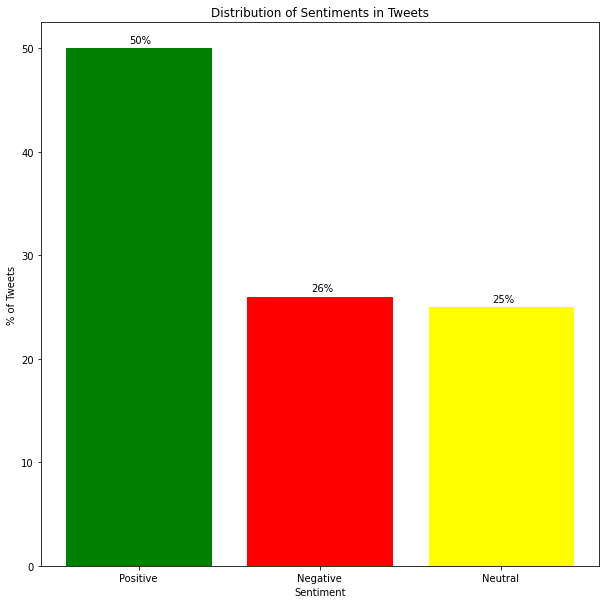

In [19]:
perc_dict = {"Positive": round(len(positive)/len(cb)*100), "Negative": round(len(negative)/len(cb)*100), "Neutral": round(len(neutral)/len(cb)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(cb)*100)+0.5, "{}%".format(round(len(positive)/len(cb)*100)))
plt.text(1-0.05, round(len(negative)/len(cb)*100)+0.5, "{}%".format(round(len(negative)/len(cb)*100)))
plt.text(2-0.05, round(len(neutral)/len(cb)*100)+0.5, "{}%".format(round(len(neutral)/len(cb)*100)))
plt.show()

## Word Clouds

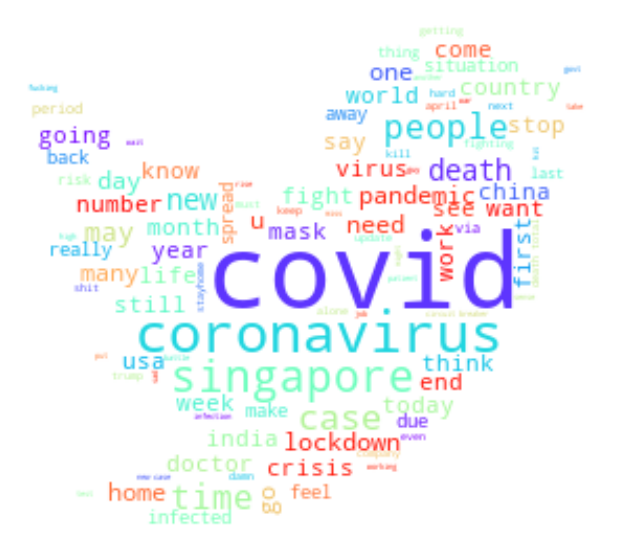

In [20]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

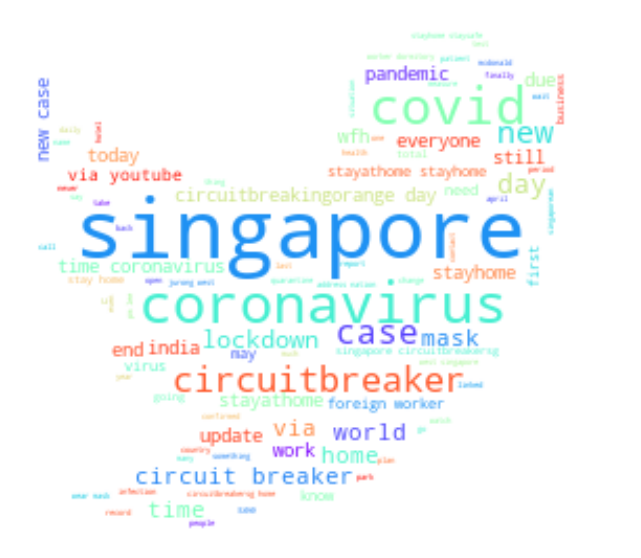

In [21]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

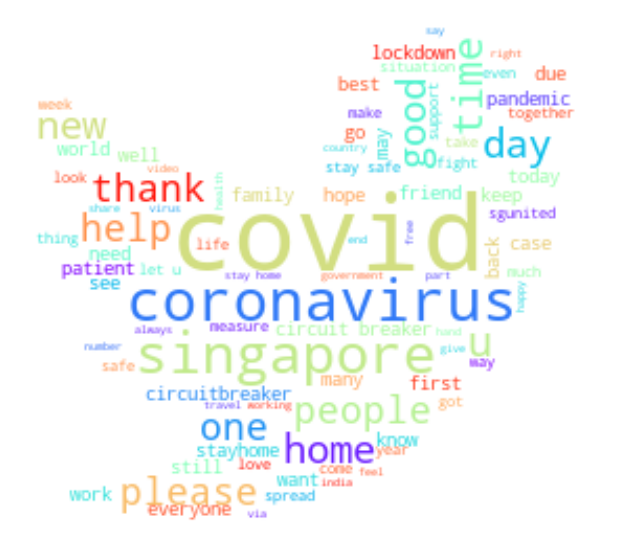

In [22]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [23]:
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

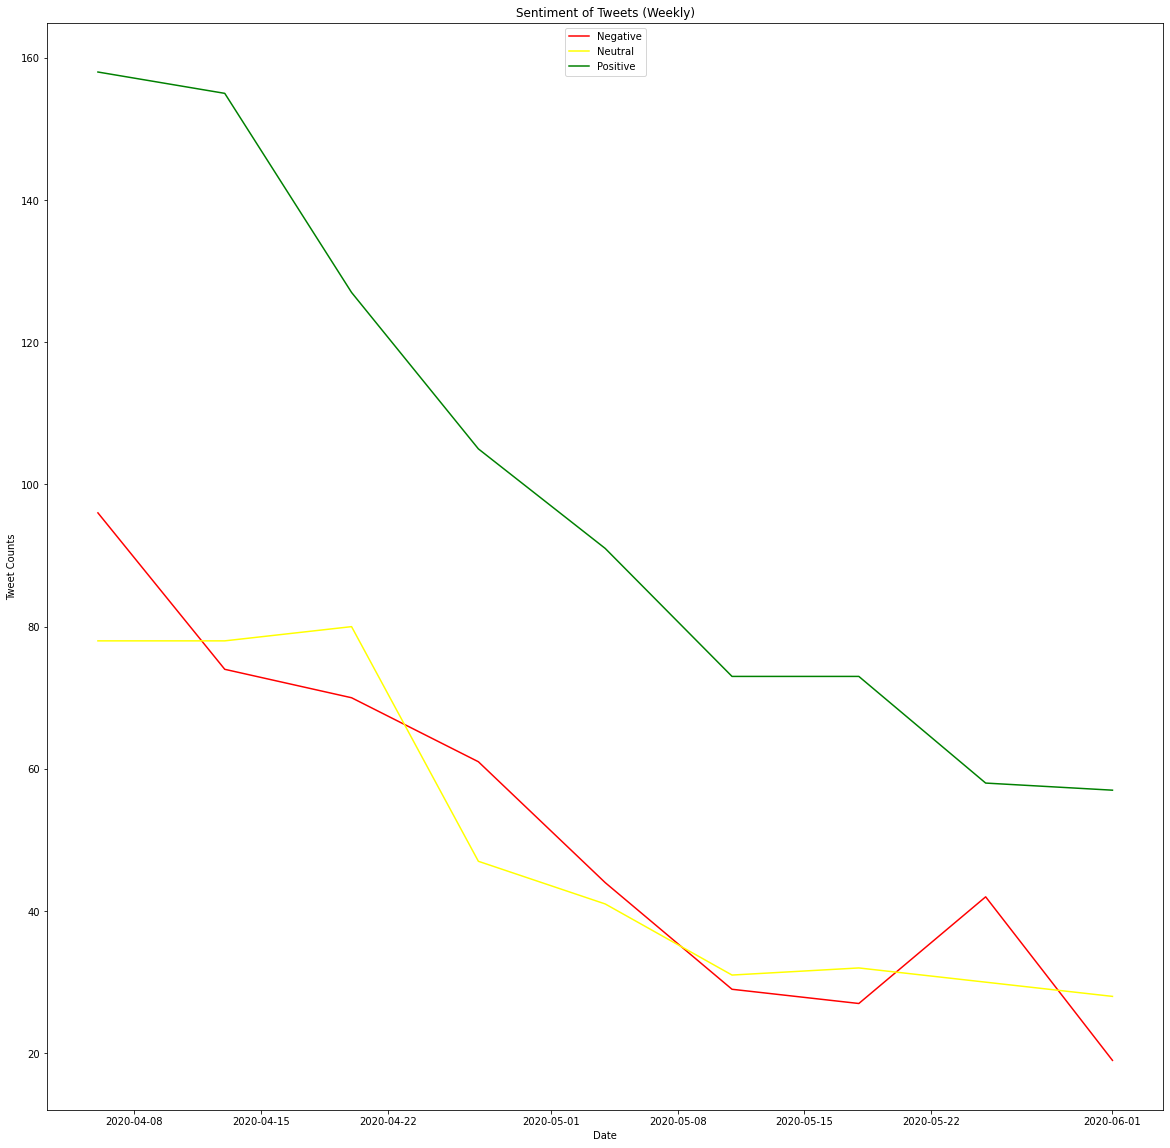

In [24]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Phases

In [25]:
phases = pd.read_csv("sg_phases.csv")
phases["date"] = pd.to_datetime(phases['date'])
phases["date"] = phases["date"].dt.tz_convert("Etc/GMT+8")
dates = phases["date"]
phases.index = dates
phases.drop("date", axis=1, inplace=True)
phases["renderedContent"] = phases['renderedContent'].apply(lambda tweet:str(tweet))
phases.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:37:02-08:00,https://twitter.com/_rodahidup/status/14658121...,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,1465812140439203842,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN
2021-11-30 07:54:52-08:00,https://twitter.com/_rodahidup/status/14657109...,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,1465710933246820367,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN
2021-11-30 07:48:16-08:00,https://twitter.com/temptempholder/status/1465...,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,1465709269370556419,...,NaN,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN
2021-11-30 04:43:53-08:00,https://twitter.com/temptempholder/status/1465...,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,1465662868578136074,...,NaN,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN
2021-11-30 04:24:35-08:00,https://twitter.com/temptempholder/status/1465...,covid sept terrorist attack happening time,covid sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,1465658013058928649,...,NaN,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN


In [26]:
sentiment_scores = phases['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2021-11-30 14:37:02-08:00    {'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'comp...
2021-11-30 07:54:52-08:00    {'neg': 0.328, 'neu': 0.672, 'pos': 0.0, 'comp...
2021-11-30 07:48:16-08:00    {'neg': 0.265, 'neu': 0.445, 'pos': 0.29, 'com...
2021-11-30 04:43:53-08:00    {'neg': 0.0, 'neu': 0.919, 'pos': 0.081, 'comp...
2021-11-30 04:24:35-08:00    {'neg': 0.661, 'neu': 0.339, 'pos': 0.0, 'comp...
                                                   ...                        
2020-06-13 00:40:28-08:00    {'neg': 0.392, 'neu': 0.608, 'pos': 0.0, 'comp...
2020-06-11 09:20:37-08:00    {'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...
2020-06-09 22:43:05-08:00    {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compou...
2020-06-01 04:37:15-08:00    {'neg': 0.107, 'neu': 0.893, 'pos': 0.0, 'comp...
2020-05-31 18:15:49-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: renderedContent, Length: 4907, dtype: object

In [27]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
phases["Sentiment"] = sentiment_label
phases.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2021-11-30 14:37:02-08:00,https://twitter.com/_rodahidup/status/14658121...,suspected omicron case taken ncid home recover...,suspected omicron case taken ncid home recover...,1465812140439203842,https://twitter.com/_rodahidup,0,0,0,0,1465812140439203842,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Suspected Omicron Covid-19 ...,NaN,NaN,Negative
2021-11-30 07:54:52-08:00,https://twitter.com/_rodahidup/status/14657109...,singapore report new case death icu utilisatio...,singapore report new case death icu utilisatio...,1465710933246820367,https://twitter.com/_rodahidup,0,0,0,0,1465710933246820367,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,"SummaryCard(title='Singapore reports 1,239 new...",NaN,NaN,Negative
2021-11-30 07:48:16-08:00,https://twitter.com/temptempholder/status/1465...,scapegoat century raeesah khan directed opaque...,scapegoat century raeesah khan directed opaque...,1465709269370556419,https://twitter.com/temptempholder,0,1,3,0,1465709269370556419,...,NaN,NaN,"Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,NaN,NaN,Positive
2021-11-30 04:43:53-08:00,https://twitter.com/temptempholder/status/1465...,math person think ability pull student rally s...,math person think ability pull student rally s...,1465662868578136074,https://twitter.com/temptempholder,0,0,0,0,1465662868578136074,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,Positive
2021-11-30 04:24:35-08:00,https://twitter.com/temptempholder/status/1465...,covid sept terrorist attack happening time,covid sept terrorist attack happening time,1465658013058928649,https://twitter.com/temptempholder,0,0,0,0,1465658013058928649,...,NaN,NaN,"Coordinates(longitude=103.817832999913, latitu...","Place(id='5f1f473ed6455f55', fullName='North-E...",NaN,NaN,NaN,NaN,NaN,Negative


In [28]:
negative = phases[phases["Sentiment"] == "Negative"]
neutral = phases[phases["Sentiment"] == "Neutral"]
positive = phases[phases["Sentiment"] == "Positive"]

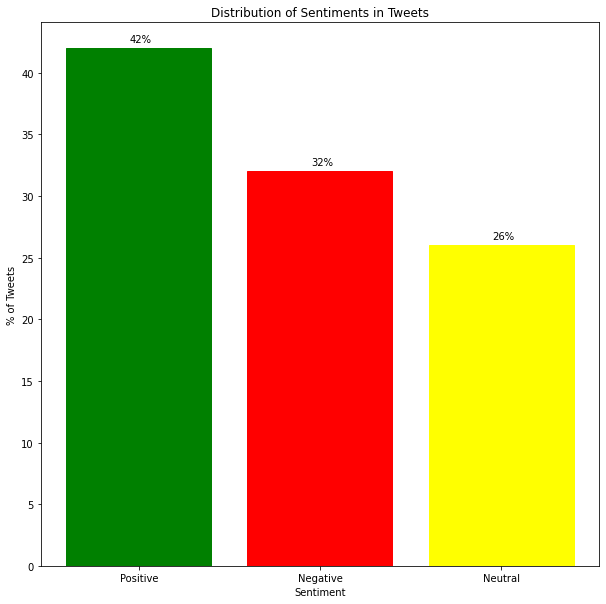

In [29]:
perc_dict = {"Positive": round(len(positive)/len(phases)*100), "Negative": round(len(negative)/len(phases)*100), "Neutral": round(len(neutral)/len(phases)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(phases)*100)+0.5, "{}%".format(round(len(positive)/len(phases)*100)))
plt.text(1-0.05, round(len(negative)/len(phases)*100)+0.5, "{}%".format(round(len(negative)/len(phases)*100)))
plt.text(2-0.05, round(len(neutral)/len(phases)*100)+0.5, "{}%".format(round(len(neutral)/len(phases)*100)))
plt.show()

## Word Clouds

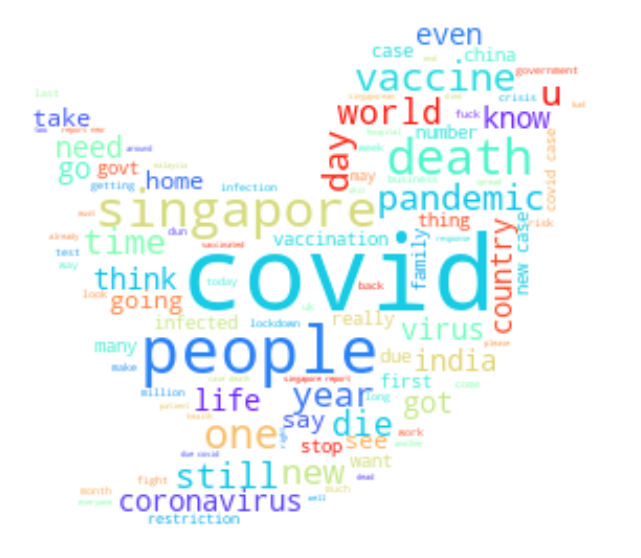

In [30]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

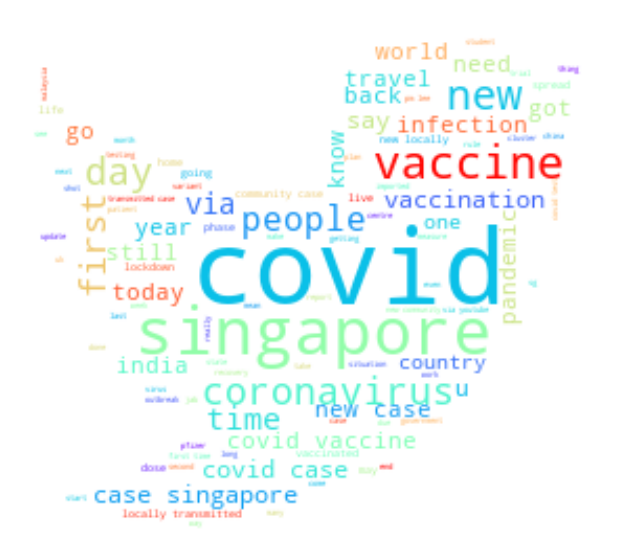

In [31]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

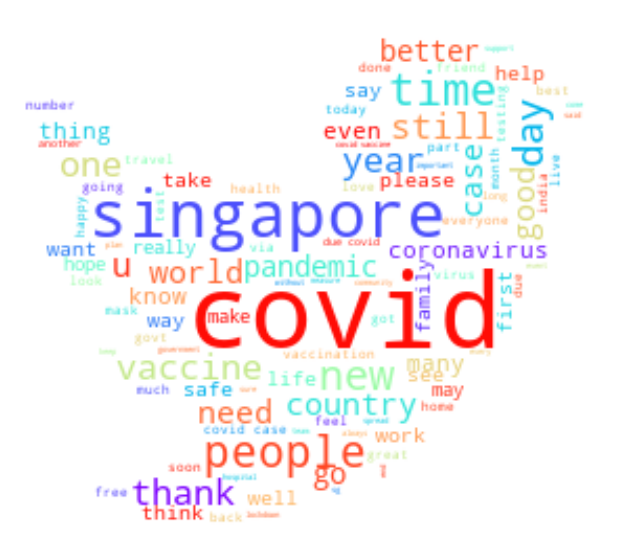

In [32]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [33]:
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

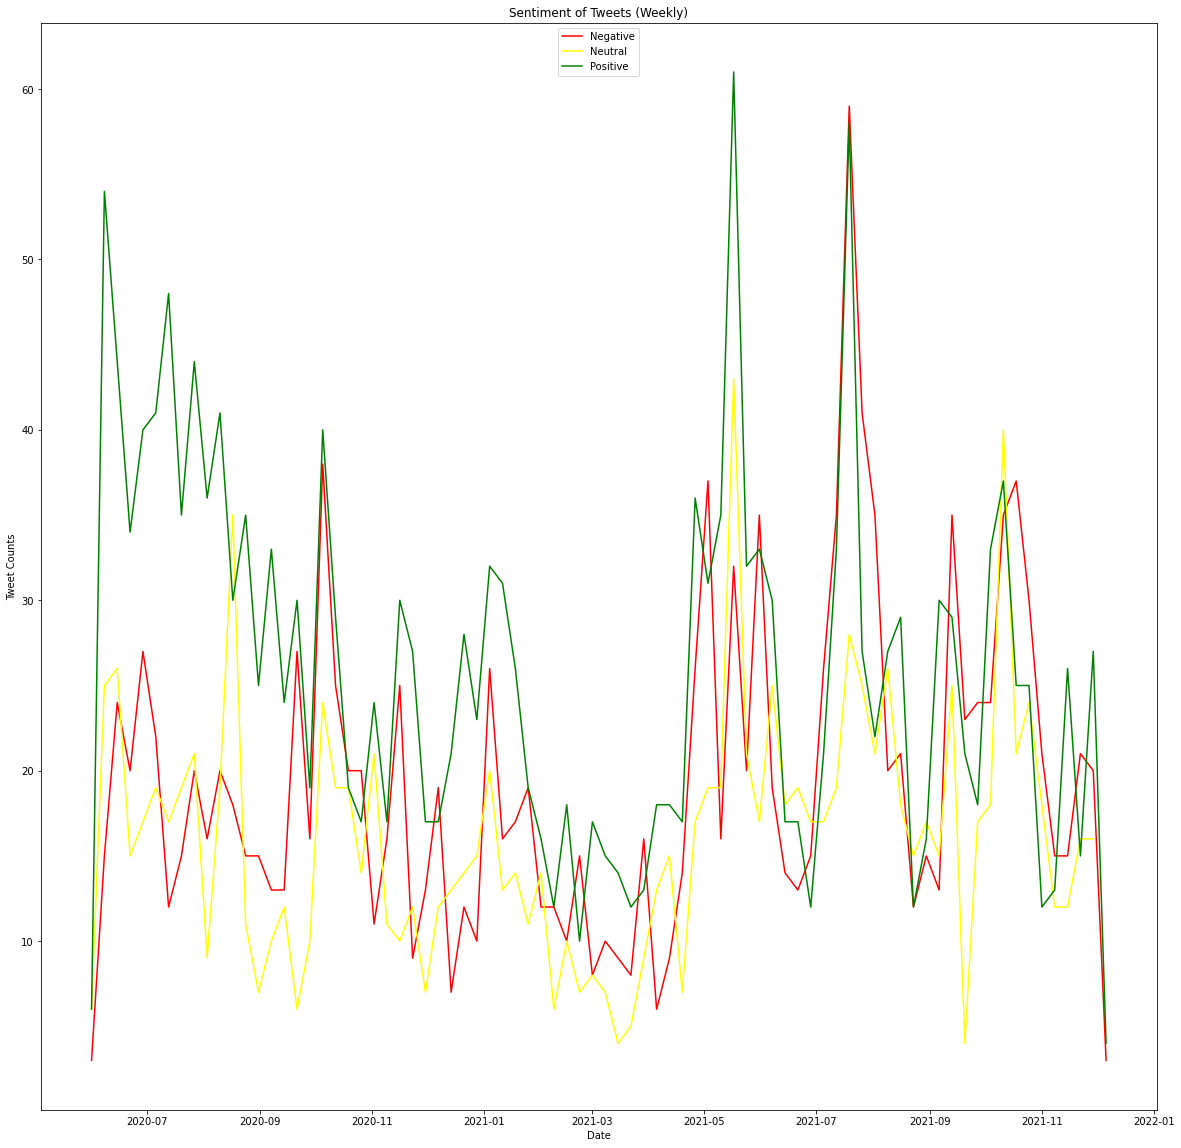

In [34]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Transition and Acute Phases

In [35]:
acute = pd.read_csv("sg_acute.csv")
acute["date"] = pd.to_datetime(acute['date'])
acute["date"] = acute["date"].dt.tz_convert("Etc/GMT+8")
dates = acute["date"]
acute.index = dates
acute.drop("date", axis=1, inplace=True)
acute["renderedContent"] = acute['renderedContent'].apply(lambda tweet:str(tweet))
acute.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2023-01-30 16:46:59-08:00,https://twitter.com/TwiddyBird62/status/162022...,spokespersonchn ccp also positively vocal zero...,spokespersonchn ccp also positively vocal zero...,1620222074311839746,https://twitter.com/TwiddyBird62,1,0,0,0,1620068062870343685,...,1.620068e+18,https://twitter.com/SpokespersonCHN,"[User(username='SpokespersonCHN', id=118369812...","Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,525.0,NaN
2023-01-30 05:18:31-08:00,https://twitter.com/graham_euan/status/1620048...,second stint singapore given greater appreciat...,second stint singapore given greater appreciat...,1620048815893131272,https://twitter.com/graham_euan,1,0,2,0,1620043653535367169,...,1.620044e+18,https://twitter.com/graham_euan,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,522.0,NaN
2023-01-29 20:18:18-08:00,https://twitter.com/saintinc/status/1619912865...,eating colleague recovered covid week ago stil...,eating colleague recovered covid week ago stil...,1619912865242120192,https://twitter.com/saintinc,0,0,0,0,1619912865242120192,...,NaN,NaN,NaN,"Coordinates(longitude=103.85009281, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Joshua Seth | Golden Shoe C...,55.0,NaN
2023-01-29 08:41:19-08:00,https://twitter.com/Mighty7693524/status/16197...,theallinpod debate saying risk dying current v...,theallinpod debate saying risk dying current v...,1619737462603145217,https://twitter.com/Mighty7693524,0,0,0,0,1619692070414999553,...,1.619736e+18,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,22.0,NaN
2023-01-29 07:36:26-08:00,https://twitter.com/Mighty7693524/status/16197...,theallinpod think covid really bad cause death...,theallinpod think covid really bad cause death...,1619721134412546048,https://twitter.com/Mighty7693524,1,0,0,0,1619692070414999553,...,1.619718e+18,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,27.0,NaN


In [36]:
sentiment_scores = acute['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2023-01-30 16:46:59-08:00    {'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...
2023-01-30 05:18:31-08:00    {'neg': 0.123, 'neu': 0.516, 'pos': 0.361, 'co...
2023-01-29 20:18:18-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023-01-29 08:41:19-08:00    {'neg': 0.277, 'neu': 0.549, 'pos': 0.173, 'co...
2023-01-29 07:36:26-08:00    {'neg': 0.318, 'neu': 0.546, 'pos': 0.136, 'co...
                                                   ...                        
2022-02-25 21:58:04-08:00    {'neg': 0.0, 'neu': 0.876, 'pos': 0.124, 'comp...
2022-02-13 22:50:30-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2022-02-06 10:49:27-08:00    {'neg': 0.394, 'neu': 0.606, 'pos': 0.0, 'comp...
2022-01-13 05:11:26-08:00    {'neg': 0.51, 'neu': 0.49, 'pos': 0.0, 'compou...
2021-12-11 04:55:01-08:00    {'neg': 0.436, 'neu': 0.476, 'pos': 0.088, 'co...
Name: renderedContent, Length: 1904, dtype: object

In [37]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
acute["Sentiment"] = sentiment_label
acute.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2023-01-30 16:46:59-08:00,https://twitter.com/TwiddyBird62/status/162022...,spokespersonchn ccp also positively vocal zero...,spokespersonchn ccp also positively vocal zero...,1620222074311839746,https://twitter.com/TwiddyBird62,1,0,0,0,1620068062870343685,...,https://twitter.com/SpokespersonCHN,"[User(username='SpokespersonCHN', id=118369812...","Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,525.0,NaN,Positive
2023-01-30 05:18:31-08:00,https://twitter.com/graham_euan/status/1620048...,second stint singapore given greater appreciat...,second stint singapore given greater appreciat...,1620048815893131272,https://twitter.com/graham_euan,1,0,2,0,1620043653535367169,...,https://twitter.com/graham_euan,NaN,"Coordinates(longitude=103.696411999967, latitu...","Place(id='14d9532bd696d8cb', fullName='North R...",NaN,NaN,NaN,522.0,NaN,Positive
2023-01-29 20:18:18-08:00,https://twitter.com/saintinc/status/1619912865...,eating colleague recovered covid week ago stil...,eating colleague recovered covid week ago stil...,1619912865242120192,https://twitter.com/saintinc,0,0,0,0,1619912865242120192,...,NaN,NaN,"Coordinates(longitude=103.85009281, latitude=1...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,SummaryCard(title='Joshua Seth | Golden Shoe C...,55.0,NaN,Neutral
2023-01-29 08:41:19-08:00,https://twitter.com/Mighty7693524/status/16197...,theallinpod debate saying risk dying current v...,theallinpod debate saying risk dying current v...,1619737462603145217,https://twitter.com/Mighty7693524,0,0,0,0,1619692070414999553,...,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,22.0,NaN,Negative
2023-01-29 07:36:26-08:00,https://twitter.com/Mighty7693524/status/16197...,theallinpod think covid really bad cause death...,theallinpod think covid really bad cause death...,1619721134412546048,https://twitter.com/Mighty7693524,1,0,0,0,1619692070414999553,...,https://twitter.com/miw888888,"[User(username='miw888888', id=135389662460751...","Coordinates(longitude=103.749959507073, latitu...","Place(id='58a4c3a0d54e1400', fullName='Central...",NaN,NaN,NaN,27.0,NaN,Negative


In [38]:
negative = acute[acute["Sentiment"] == "Negative"]
neutral = acute[acute["Sentiment"] == "Neutral"]
positive = acute[acute["Sentiment"] == "Positive"]

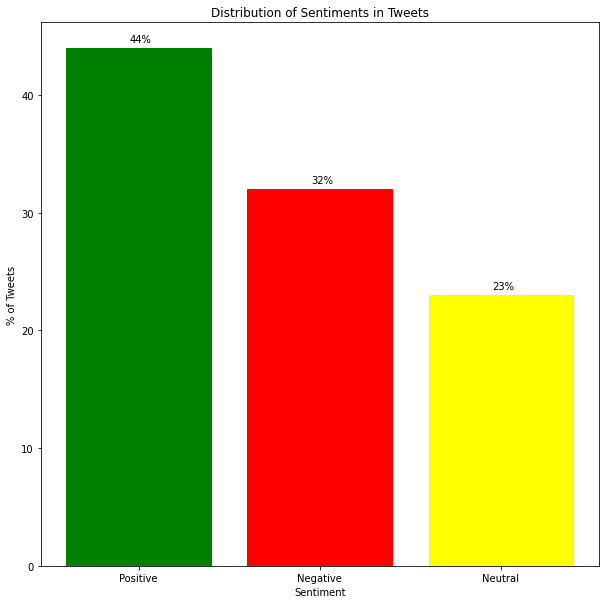

In [39]:
perc_dict = {"Positive": round(len(positive)/len(acute)*100), "Negative": round(len(negative)/len(acute)*100), "Neutral": round(len(neutral)/len(acute)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(acute)*100)+0.5, "{}%".format(round(len(positive)/len(acute)*100)))
plt.text(1-0.05, round(len(negative)/len(acute)*100)+0.5, "{}%".format(round(len(negative)/len(acute)*100)))
plt.text(2-0.05, round(len(neutral)/len(acute)*100)+0.5, "{}%".format(round(len(neutral)/len(acute)*100)))
plt.show()

## Word Clouds

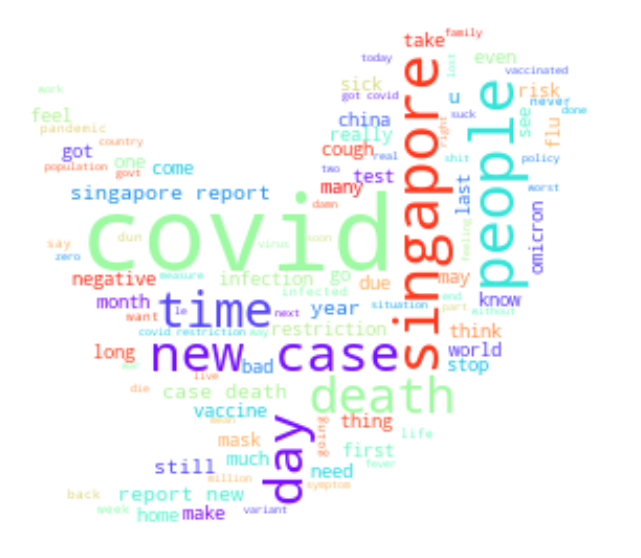

In [40]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

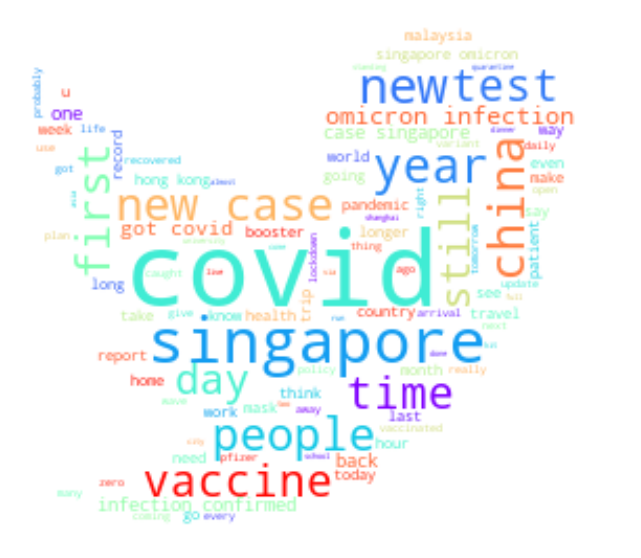

In [41]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

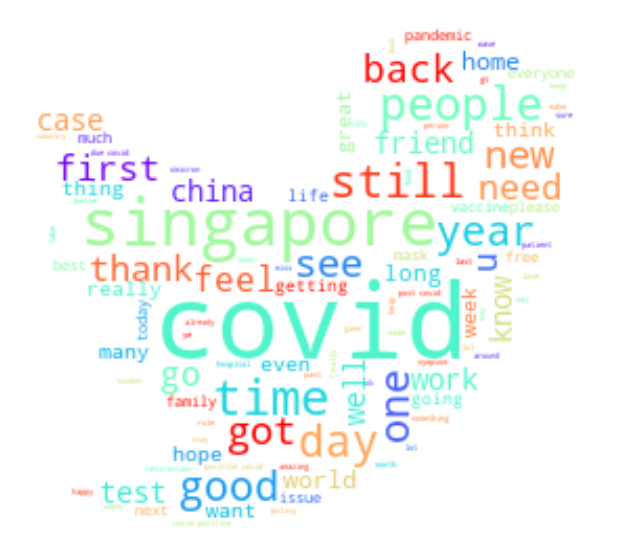

In [42]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [43]:
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

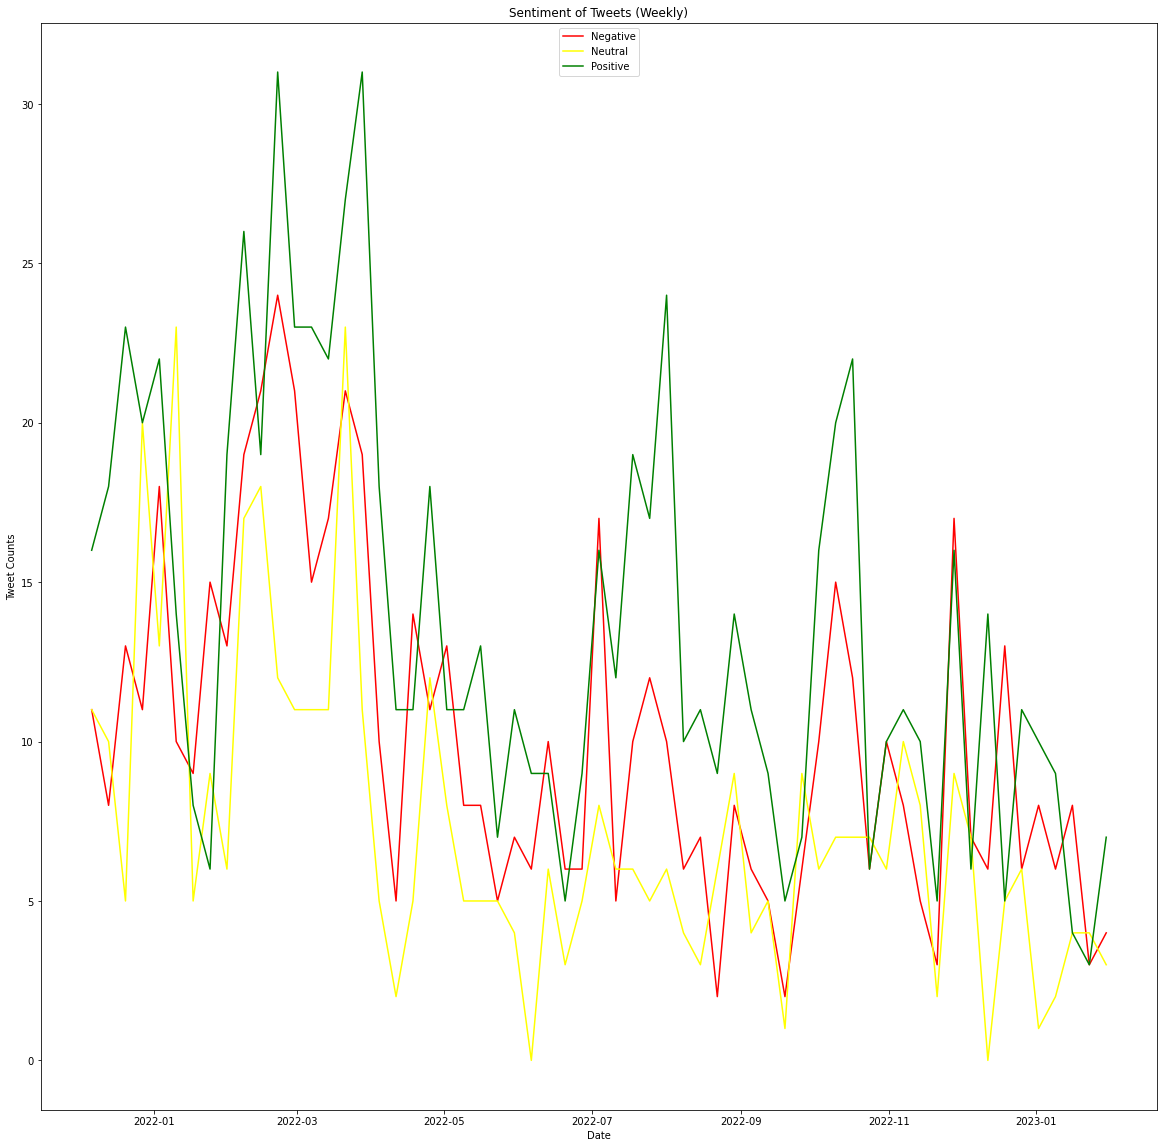

In [44]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Endemic Phase (DORSCON GREEN)

In [45]:
green = pd.read_csv("sg_green.csv")
green["date"] = pd.to_datetime(green['date'])
green["date"] = green["date"].dt.tz_convert("Etc/GMT+8")
dates = green["date"]
green.index = dates
green.drop("date", axis=1, inplace=True)
green["renderedContent"] = green['renderedContent'].apply(lambda tweet:str(tweet))
green.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2023-02-28 15:48:40-08:00,https://twitter.com/khainad/status/16307166453...,girl contracted covid month old wife taking ca...,girl contracted covid month old wife taking ca...,1630716645357522944,https://twitter.com/khainad,1,0,0,0,1630716645357522944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN
2023-02-28 14:30:03-08:00,https://twitter.com/MattHarrisEdD/status/16306...,tip cybersafety family edtech globaled elearni...,tip cybersafety family edtech globaled elearni...,1630696860598915075,https://twitter.com/MattHarrisEdD,0,0,0,0,1630696860598915075,...,NaN,NaN,NaN,NaN,NaN,"['Edtech', 'GlobalEd', 'elearning', 'edutech']",NaN,SummaryCard(title='5 Tips for CyberSafety for ...,72.0,NaN
2023-02-28 12:33:20-08:00,https://twitter.com/Chindyagung1/status/163066...,algodtrading imagine take vaccinate survive su...,algodtrading imagine take vaccinate survive su...,1630667487745576960,https://twitter.com/Chindyagung1,0,0,0,0,1630642132527530011,...,1.630642e+18,https://twitter.com/AlgodTrading,"[User(username='AlgodTrading', id=117864028365...",NaN,NaN,NaN,NaN,NaN,20.0,NaN
2023-02-28 11:59:48-08:00,https://twitter.com/mfame_guru/status/16306590...,hong kong scrapping mask mandate wednesday nea...,hong kong scrapping mask mandate wednesday nea...,1630659051599065088,https://twitter.com/mfame_guru,0,0,0,0,1630659051599065088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Hong Kong Ends One of World...,16.0,NaN
2023-02-28 11:50:00-08:00,https://twitter.com/mfame_guru/status/16306565...,geopolitical uncertainty brought ukrainian war...,geopolitical uncertainty brought ukrainian war...,1630656583733596160,https://twitter.com/mfame_guru,0,0,0,0,1630656583733596160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='What are Business Leaders D...,7.0,NaN


In [46]:
sentiment_scores = green['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2023-02-28 15:48:40-08:00    {'neg': 0.0, 'neu': 0.519, 'pos': 0.481, 'comp...
2023-02-28 14:30:03-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023-02-28 12:33:20-08:00    {'neg': 0.158, 'neu': 0.699, 'pos': 0.143, 'co...
2023-02-28 11:59:48-08:00    {'neg': 0.053, 'neu': 0.947, 'pos': 0.0, 'comp...
2023-02-28 11:50:00-08:00    {'neg': 0.311, 'neu': 0.601, 'pos': 0.088, 'co...
                                                   ...                        
2023-01-31 18:16:24-08:00    {'neg': 0.608, 'neu': 0.392, 'pos': 0.0, 'comp...
2023-02-28 05:00:17-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023-02-28 04:03:00-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023-02-27 16:08:34-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023-02-27 10:29:04-08:00    {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'comp...
Name: renderedContent, Length: 144, dtype: object

In [47]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
green["Sentiment"] = sentiment_label
green.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2023-02-28 15:48:40-08:00,https://twitter.com/khainad/status/16307166453...,girl contracted covid month old wife taking ca...,girl contracted covid month old wife taking ca...,1630716645357522944,https://twitter.com/khainad,1,0,0,0,1630716645357522944,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,Positive
2023-02-28 14:30:03-08:00,https://twitter.com/MattHarrisEdD/status/16306...,tip cybersafety family edtech globaled elearni...,tip cybersafety family edtech globaled elearni...,1630696860598915075,https://twitter.com/MattHarrisEdD,0,0,0,0,1630696860598915075,...,NaN,NaN,NaN,NaN,"['Edtech', 'GlobalEd', 'elearning', 'edutech']",NaN,SummaryCard(title='5 Tips for CyberSafety for ...,72.0,NaN,Neutral
2023-02-28 12:33:20-08:00,https://twitter.com/Chindyagung1/status/163066...,algodtrading imagine take vaccinate survive su...,algodtrading imagine take vaccinate survive su...,1630667487745576960,https://twitter.com/Chindyagung1,0,0,0,0,1630642132527530011,...,https://twitter.com/AlgodTrading,"[User(username='AlgodTrading', id=117864028365...",NaN,NaN,NaN,NaN,NaN,20.0,NaN,Negative
2023-02-28 11:59:48-08:00,https://twitter.com/mfame_guru/status/16306590...,hong kong scrapping mask mandate wednesday nea...,hong kong scrapping mask mandate wednesday nea...,1630659051599065088,https://twitter.com/mfame_guru,0,0,0,0,1630659051599065088,...,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Hong Kong Ends One of World...,16.0,NaN,Negative
2023-02-28 11:50:00-08:00,https://twitter.com/mfame_guru/status/16306565...,geopolitical uncertainty brought ukrainian war...,geopolitical uncertainty brought ukrainian war...,1630656583733596160,https://twitter.com/mfame_guru,0,0,0,0,1630656583733596160,...,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='What are Business Leaders D...,7.0,NaN,Negative


In [48]:
negative = green[green["Sentiment"] == "Negative"]
neutral = green[green["Sentiment"] == "Neutral"]
positive = green[green["Sentiment"] == "Positive"]

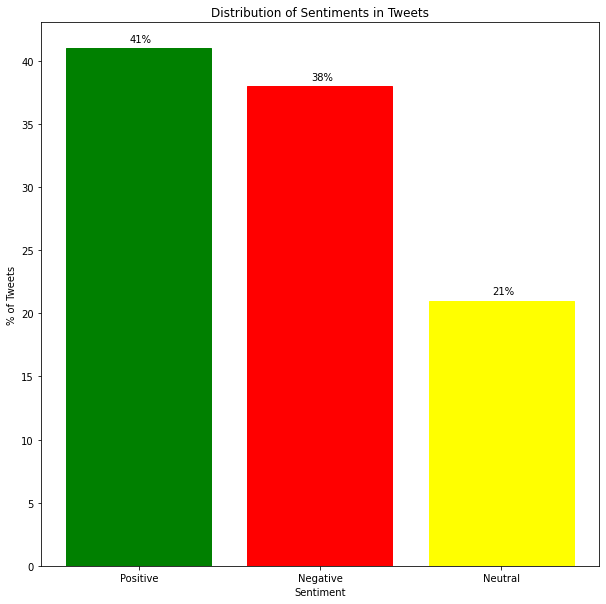

In [49]:
perc_dict = {"Positive": round(len(positive)/len(green)*100), "Negative": round(len(negative)/len(green)*100), "Neutral": round(len(neutral)/len(green)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(green)*100)+0.5, "{}%".format(round(len(positive)/len(green)*100)))
plt.text(1-0.05, round(len(negative)/len(green)*100)+0.5, "{}%".format(round(len(negative)/len(green)*100)))
plt.text(2-0.05, round(len(neutral)/len(green)*100)+0.5, "{}%".format(round(len(neutral)/len(green)*100)))
plt.show()

## Word Clouds

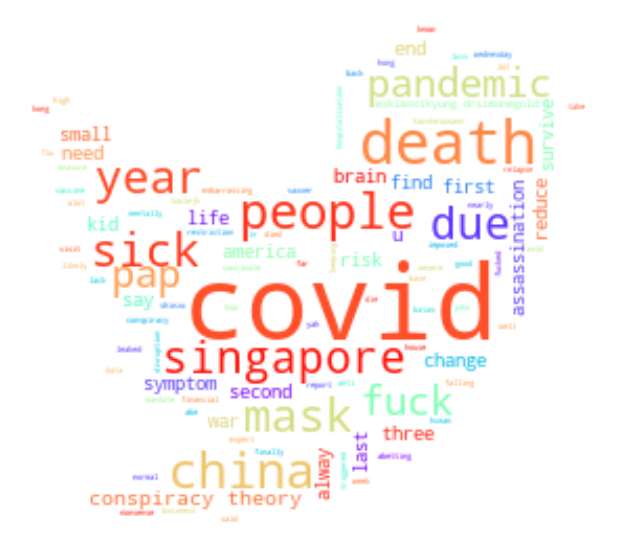

In [50]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

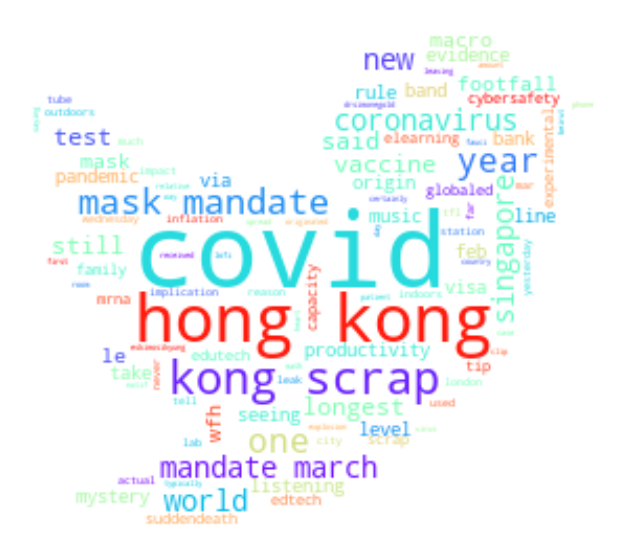

In [51]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

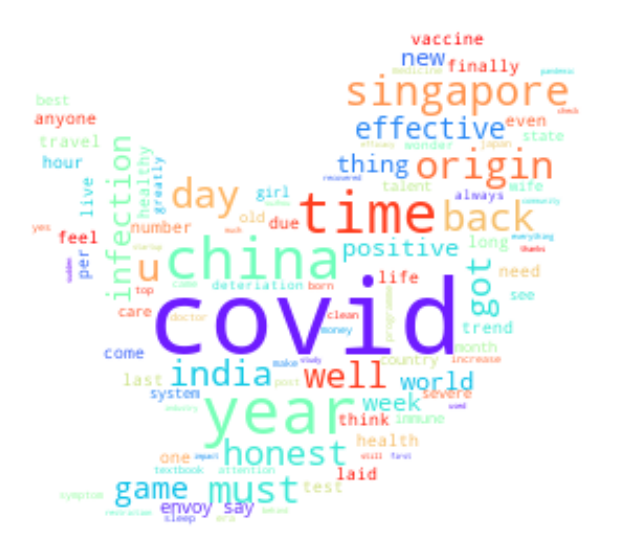

In [52]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [53]:
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

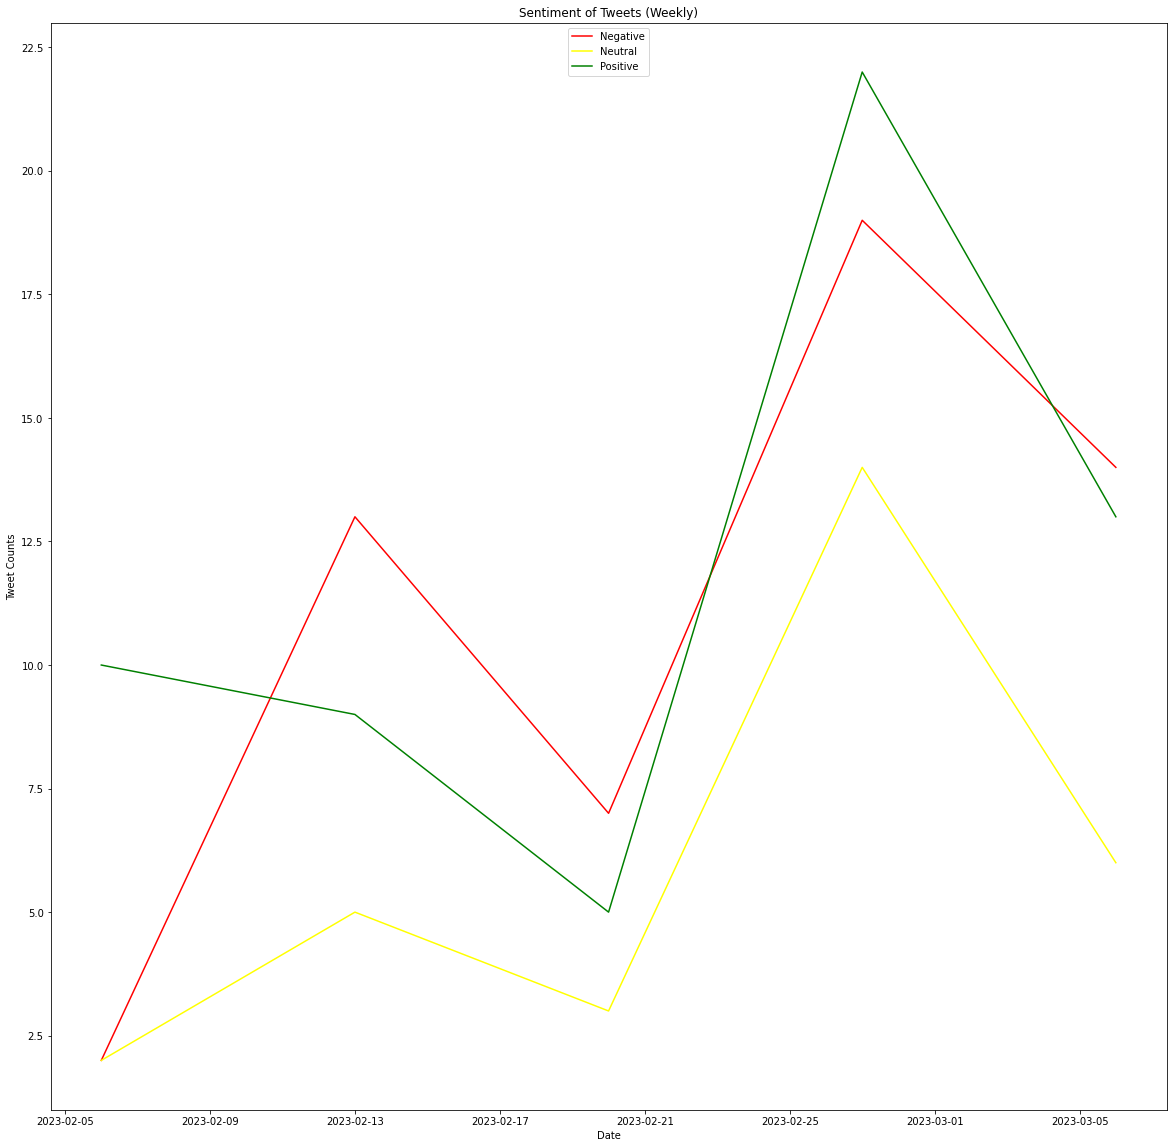

In [54]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()